In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Cardiovascular Heart Disease Risk Factors<br>
<p>Cardiovascular disease is the leading cause of death in the US. To better understand it's symptoms, causes, and risk factors we can take a look at the relationships and correlations in patient and population data. This data set has 70,000 patients data with demographic, observed, and reported data points to consider.</p>
<p>Overview of our data set:</p>

In [3]:
cardio_data = pd.read_csv('cardio_train.csv', sep = ';')
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<p>A look at the dataframe keys and data types:</p>

In [4]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<p>Because all of the data types are numeric I am going to run describe to see what I can find out about the data at a glance.</p>

In [5]:
cardio_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<p>So we have 70,000 entries and some good starting information on what is going on with this data. Smoking, alcohol use, and activity level are denoted with binary (0: No, 1: Yes) while cholesterol and glucose are measured in 3 levels (1: normal, 2: above normal, 3: well above normal). Next we will clean and wrangle it so we can get to asking questions.</p><p></p>

### Cleaning The Data<br>
<p>I want to check for any missing information and then remove some unnecessary information.</p>

In [6]:
# clean data time
# check for null/NA
cardio_data.isnull().sum()
# no null values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<p>So there are no null values in the data set which is very helpful. I will be leaving the id column as a data management and safe keeping measure. If I were a part of this study's team I would need to maintain the id for each patient in order to steward the data, make changes, and keep patient data safe.</p><p></p>
<b>Wrangling the Data</b>
<p>Some of this information is in units that aren't very usable to me, others are formatted in a way that is a bit confusing, and then I would like to add a column for BMI as a measure of weight relative to height. With age I want to convert it from days to years, and add a category for age groups to help get a sense of the data. The age groups I will be using are from an NIH study on defining more useable age categories for continued medical research. The study will be citied at the bottom of this document. </p>

In [7]:
# wrangling:
# age to years
def day_to_yr(days):
    year = days // 365
    return year

years = []
for patient in cardio_data['age']:
    years.append(day_to_yr(patient))
cardio_data['age'] = years

def age_grouper(the_age):
    if the_age < 18:
        group = 'Adolescent'
    elif the_age < 24:
        group = 'Young Adult'
    elif the_age < 45:
        group = 'Adult'
    elif the_age < 65:
        group = 'Middle Adult'
    else:
        group = 'Older Adult'
    return group

ag = []
for patient in cardio_data['age']:
    ag.append(age_grouper(patient))
cardio_data['age_group'] = ag

# bmi
def hw_to_bmi(height, weight):
    bmi = weight / ((height/100)**2)
    return bmi

bmis = []
for i in range(len(cardio_data['height'])):
    bmis.append(hw_to_bmi(cardio_data['height'][i], cardio_data['weight'][i]))
cardio_data['bmi'] = bmis

def to_true_false(binary):
    t_or_f = 'True'
    if binary == 0:
        t_or_f = 'False'
    return t_or_f

smokes = []
for patient in cardio_data['smoke']:
    smokes.append(to_true_false(patient))
cardio_data['smoke'] = smokes

alcohol = []
for patient in cardio_data['alco']:
    alcohol.append(to_true_false(patient))
cardio_data['alco'] = alcohol

actives = []
for patient in cardio_data['active']:
    actives.append(to_true_false(patient))
cardio_data['active'] = actives

cd = []
for patient in cardio_data['cardio']:
    cd.append(to_true_false(patient))
cardio_data['cardio'] = cd

# gender to MF
def get_gender(gen_num):
    gender = 'Female'
    if gen_num == 2:
        gender = 'Male'
    return gender

genders = []
for patient in cardio_data['gender']:
    genders.append(get_gender(patient))
cardio_data['gender'] = genders



# make separate MF df

male_data = cardio_data[cardio_data['gender']=='Male']
female_data = cardio_data[cardio_data['gender']=='Female']

cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi
0,0,50,Male,168,62.0,110,80,1,1,False,False,True,False,Middle Adult,21.967120
1,1,55,Female,156,85.0,140,90,3,1,False,False,True,True,Middle Adult,34.927679
2,2,51,Female,165,64.0,130,70,3,1,False,False,False,True,Middle Adult,23.507805
3,3,48,Male,169,82.0,150,100,1,1,False,False,True,True,Middle Adult,28.710479
4,4,47,Female,156,56.0,100,60,1,1,False,False,False,False,Middle Adult,23.011177


<p>I also went ahead and created separate dataframes for the male and female information for ease of use in visualizing data later. </p> <p> </p>

### Investigation <br>
<p>Now onto the data exploration, I went through first and looked at each variable separately before getting into asking deeper questions. </p>
<p>The first variable to take a look at is age: </p>

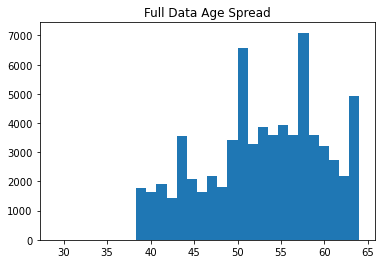

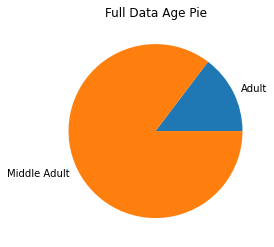

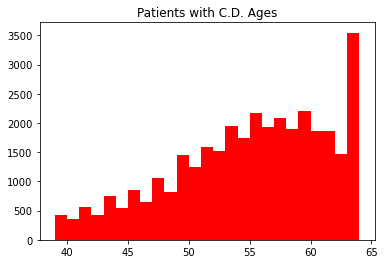

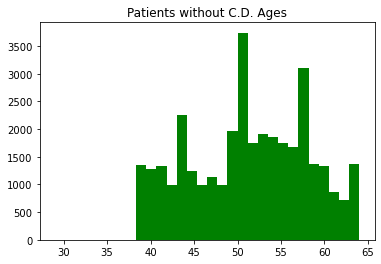

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,27.556513
std,28851.302323,6.766774,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,6.091511
min,0.000000,29.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,3.471784
25%,25006.750000,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,23.875115
50%,50001.500000,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,26.374068
75%,74889.250000,58.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,30.222222
max,99999.000000,64.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,298.666667


In [68]:
# Connection between age and cardio disease

plt.hist(cardio_data['age'], bins = 30)
plt.title('Full Data Age Spread')
plt.show()

ag_counted = cardio_data.groupby(['age_group']).count()

plt.pie(ag_counted['age'], labels = ag_counted.index.values)
plt.title('Full Data Age Pie')
plt.show()

cd_cardio_data = cardio_data[cardio_data['cardio'] == 'True']
no_cd_cardio_data = cardio_data[cardio_data['cardio'] == 'False']

plt.hist(cd_cardio_data['age'], bins = 25, color = 'red')
plt.title('Patients with C.D. Ages')
plt.show()

plt.hist(no_cd_cardio_data['age'], bins = 30, color = 'green')
plt.title('Patients without C.D. Ages')
plt.show()

cardio_data.sort_values(by = 'age')

cd_cardio_data.describe()
no_cd_cardio_data.describe()

cardio_data.describe()

<p> We only have Middle Adults and Adults in this study, the youngest of which is 29 and the oldest is 64. The biggest of that spread is between 50 to 60. The tail of patients under 40 nearly all do not have cardiovascular disease. The spread of 40 to 65 is fairly even. The average age of those with cardiovascular disease is 54.45, the average age of those without is 51.23. </p><p> </p>
<b> Gender: </b>

In [49]:
# Gender and cardio disease

g_cd_counts = cardio_data.groupby(['gender', 'cardio']).count()
g_cd_counts

female_data.describe()
male_data.describe()

f_cd_cardio_data = female_data[female_data['cardio'] == 'True']
f_no_cd_cardio_data = female_data[female_data['cardio'] == 'False']
m_cd_cardio_data = male_data[male_data['cardio'] == 'True']
m_no_cd_cardio_data = male_data[male_data['cardio'] == 'False']


id    age  height  weight  ap_hi  ap_lo  cholesterol   gluc  \
gender cardio                                                                   
Female False   22914  22914   22914   22914  22914  22914        22914  22914   
       True    22616  22616   22616   22616  22616  22616        22616  22616   
Male   False   12107  12107   12107   12107  12107  12107        12107  12107   
       True    12363  12363   12363   12363  12363  12363        12363  12363   

               smoke   alco  active  age_group    bmi  
gender cardio                                          
Female False   22914  22914   22914      22914  22914  
       True    22616  22616   22616      22616  22616  
Male   False   12107  12107   12107      12107  12107  
       True    12363  12363   12363      12363  12363

<p> Within the genders there is an equal divide of those with cardiovascular disease and those without. There is nearly twice as men in the study as women. The average age of the male patients is 52.95 and female patiens is 52.62.</p>
<p></p>
<b> Height: </b>

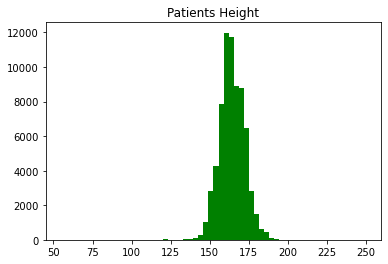

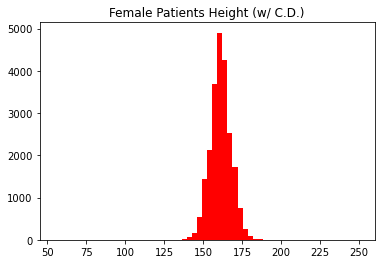

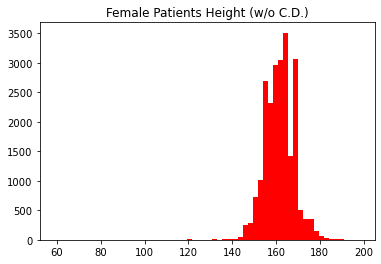

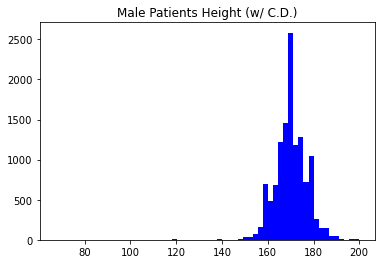

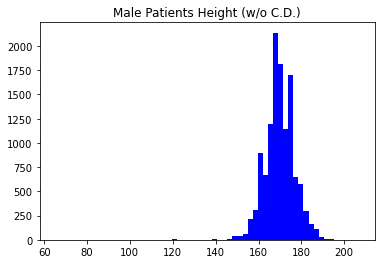

count        mean       std   min    25%    50%    75%    max
gender cardio                                                                 
Female False   22914.0  161.608405  7.010019  59.0  157.0  162.0  166.0  198.0
       True    22616.0  161.099487  7.086697  55.0  156.0  161.0  165.0  250.0
Male   False   12107.0  169.822334  7.412181  65.0  165.0  170.0  174.0  207.0
       True    12363.0  170.070857  7.042915  67.0  166.0  170.0  175.0  200.0

In [55]:
# Height and cardio disease
# Full patient height spread
plt.hist(cardio_data['height'], bins = 60, color = 'green')
plt.title('Patients Height')
plt.show()

#Female Patient Heights
plt.hist(f_cd_cardio_data['height'], bins = 60, color = 'red')
plt.title('Female Patients Height (w/ C.D.)')
plt.show()

plt.hist(f_no_cd_cardio_data['height'], bins = 60, color = 'red')
plt.title('Female Patients Height (w/o C.D.)')
plt.show()

#Male Patient Heights
plt.hist(m_cd_cardio_data['height'], bins = 60, color = 'blue')
plt.title('Male Patients Height (w/ C.D.)')
plt.show()

plt.hist(m_no_cd_cardio_data['height'], bins = 60, color = 'blue')
plt.title('Male Patients Height (w/o C.D.)')
plt.show()

gc_df = cardio_data.groupby(['gender', 'cardio'])
gc_df['height'].describe()

<p> The height of patients is similar across both those with and without cardiovascular disease. </p>
<p> </p>
<b>Weight: </b>

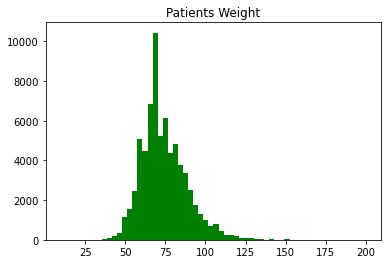

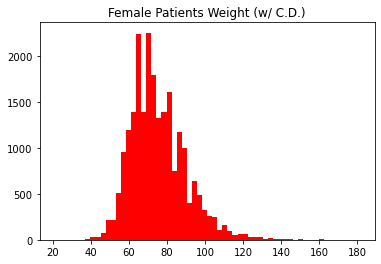

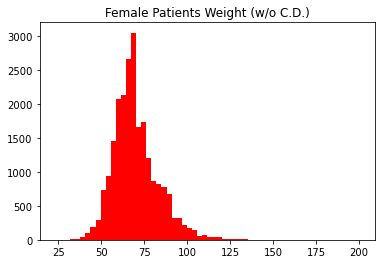

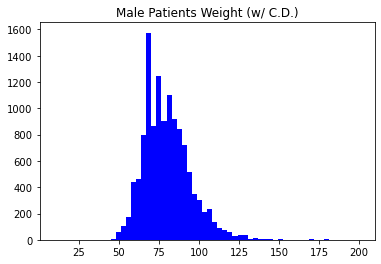

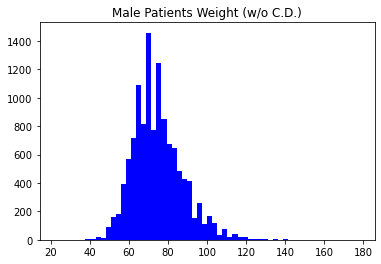

In [18]:
# Weight and cardio disease
# Full patient weight spread
plt.hist(cardio_data['weight'], bins = 60, color = 'green')
plt.title('Patients Weight')
plt.show()

#Female Patient Weights
plt.hist(f_cd_cardio_data['weight'], bins = 60, color = 'red')
plt.title('Female Patients Weight (w/ C.D.)')
plt.show()

plt.hist(f_no_cd_cardio_data['weight'], bins = 60, color = 'red')
plt.title('Female Patients Weight (w/o C.D.)')
plt.show()

#Male Patient Weights
plt.hist(m_cd_cardio_data['weight'], bins = 60, color = 'blue')
plt.title('Male Patients Weight (w/ C.D.)')
plt.show()

plt.hist(m_no_cd_cardio_data['weight'], bins = 60, color = 'blue')
plt.title('Male Patients Weight (w/o C.D.)')
plt.show()

# m_cd_cardio_data.describe()

<p>The average weights for those with cardivascular disease is 5 kg higher than those without cardiovascular disease.</p>
<p></p>
<b> BMI: </b>

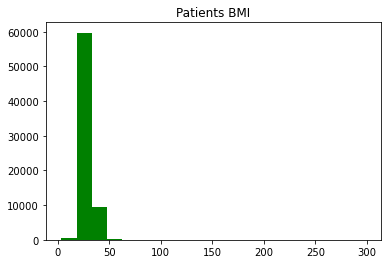

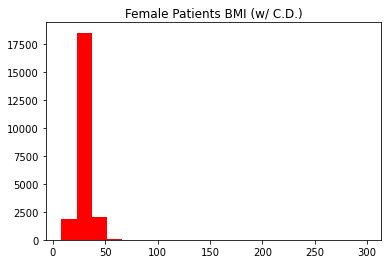

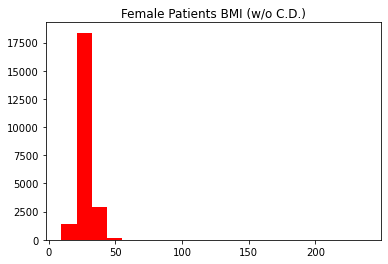

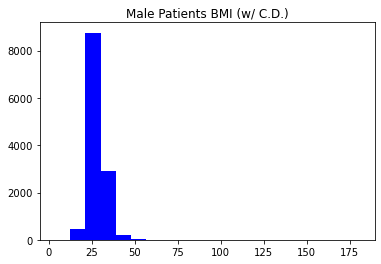

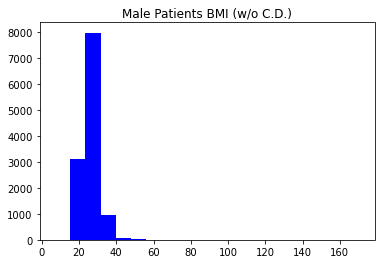

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,bmi
count,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000,22914.000000
mean,49886.614166,51.268788,161.608405,69.992834,119.992319,81.966527,1.227154,1.178013,26.891787
std,28781.688051,6.666640,7.010019,13.178415,126.909019,115.811455,0.535424,0.511760,5.883630
min,4.000000,29.000000,59.000000,23.000000,-100.000000,0.000000,1.000000,1.000000,9.331007
25%,24837.750000,46.000000,157.000000,61.000000,110.000000,70.000000,1.000000,1.000000,23.437500
50%,50071.000000,52.000000,162.000000,68.000000,120.000000,80.000000,1.000000,1.000000,25.711662
75%,74666.250000,56.000000,166.000000,77.000000,120.000000,80.000000,1.000000,1.000000,29.402273
max,99999.000000,64.000000,198.000000,200.000000,14020.000000,8200.000000,3.000000,3.000000,237.768633


In [22]:
# BMI and cardio disease
# Full patient bmi spread
plt.hist(cardio_data['bmi'], bins = 20, color = 'green')
plt.title('Patients BMI')
plt.show()

#Female Patient Heights
plt.hist(f_cd_cardio_data['bmi'], bins = 20, color = 'red')
plt.title('Female Patients BMI (w/ C.D.)')
plt.show()

plt.hist(f_no_cd_cardio_data['bmi'], bins = 20, color = 'red')
plt.title('Female Patients BMI (w/o C.D.)')
plt.show()

#Male Patient Heights
plt.hist(m_cd_cardio_data['bmi'], bins = 20, color = 'blue')
plt.title('Male Patients BMI (w/ C.D.)')
plt.show()

plt.hist(m_no_cd_cardio_data['bmi'], bins = 20, color = 'blue')
plt.title('Male Patients BMI (w/o C.D.)')
plt.show()

# f_no_cd_cardio_data.describe()

<p> The average BMI for patients with cardiovascular disease is 2 kg/m2 higher than their counterparts. The spread of those bmi tends to be tighter in those without cardiovascular disease, while there tends to be more of a postive skew.  
</p>
<p> </p>
<b>Blood Pressue: </b>

In [32]:
cardio_data[cardio_data['cardio']=='False'].describe()
cardio_data[cardio_data['cardio']=='True'].describe()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,bmi
count,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000
mean,50082.102233,54.452014,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,28.566061
std,28834.739699,6.354347,8.270084,14.960125,191.289607,217.805266,0.776355,0.624617,6.383666
min,1.000000,39.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,3.471784
25%,25272.500000,50.000000,159.000000,66.000000,120.000000,80.000000,1.000000,1.000000,24.489796
50%,50115.000000,55.000000,165.000000,75.000000,130.000000,80.000000,1.000000,1.000000,27.471384
75%,75027.500000,59.000000,170.000000,85.000000,140.000000,90.000000,2.000000,1.000000,31.555556
max,99998.000000,64.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,298.666667


<p> In those without cardiovascular disease the mean systolic blood pressue is 120.43 with an interquartile range of 10 and  the mean diastolic blood pressure is 84.25 with an interquartile range of 10. These fall into the normal blood pressure category according to the American Heart Association. In those with cardiovascular disease the mean systolic blood pressue is 137.21 with an interquartile range of 20 and  the mean diastolic blood pressure is 109.02 with an interquartile range of 10. These fall into the high blood pressure stage 1 and 2 categories according to the American Heart Association.
</p>
<p> </p>
<b>Cholesterol: </b>

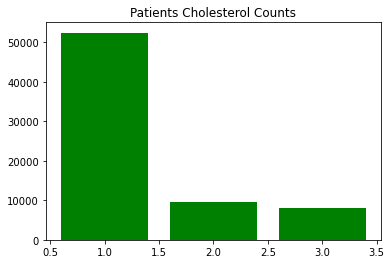

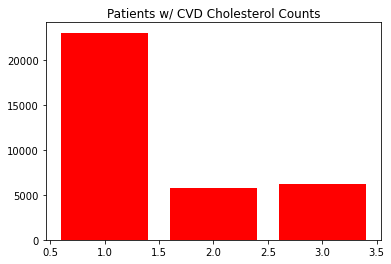

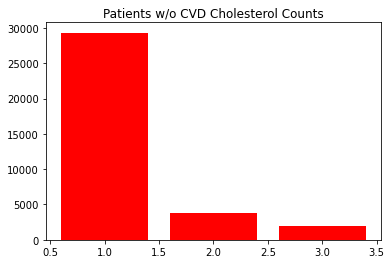

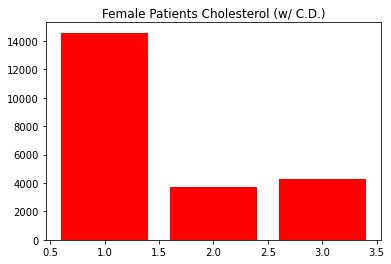

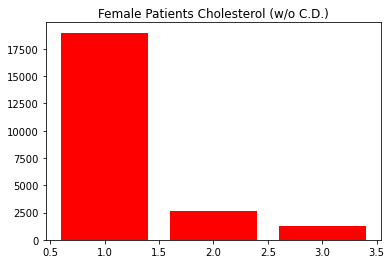

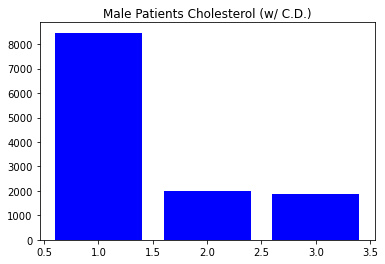

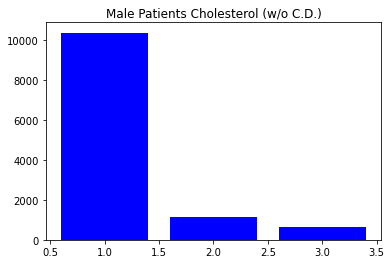

In [58]:
# Cholesterol
chol_data = cardio_data.groupby('cholesterol').count()
 
# creating the bar plot
plt.bar(chol_data.index.values, chol_data['id'], color = 'green')
plt.title('Patients Cholesterol Counts')
plt.show()

cd_chol_data = cd_cardio_data.groupby('cholesterol').count()
nocd_chol_data = no_cd_cardio_data.groupby('cholesterol').count()
# creating the bar plot
plt.bar(cd_chol_data.index.values, cd_chol_data['id'], color = 'red')
plt.title('Patients w/ CVD Cholesterol Counts')
plt.show()
plt.bar(nocd_chol_data.index.values, nocd_chol_data['id'], color = 'red')
plt.title('Patients w/o CVD Cholesterol Counts')
plt.show()

#Female Patient Heights
f_chol_data = f_cd_cardio_data.groupby('cholesterol').count()
plt.bar(f_chol_data.index.values, f_chol_data['id'], color = 'red')
plt.title('Female Patients Cholesterol (w/ C.D.)')
plt.show()

f_no_chol_data = f_no_cd_cardio_data.groupby('cholesterol').count()
plt.bar(f_no_chol_data.index.values, f_no_chol_data['id'], color = 'red')
plt.title('Female Patients Cholesterol (w/o C.D.)')
plt.show()

#Male Patient Heights
m_chol_data = m_cd_cardio_data.groupby('cholesterol').count()
plt.bar(m_chol_data.index.values, m_chol_data['id'], color = 'blue')
plt.title('Male Patients Cholesterol (w/ C.D.)')
plt.show()

m_no_chol_data = m_no_cd_cardio_data.groupby('cholesterol').count()
plt.bar(m_no_chol_data.index.values, m_no_chol_data['id'], color = 'blue')
plt.title('Male Patients Cholesterol (w/o C.D.)')
plt.show()


<p> Patients with cardiovascular disease tend to have higher levels of cholesterol than those without. </p>
<p></p>
<b> Glucose: </b>

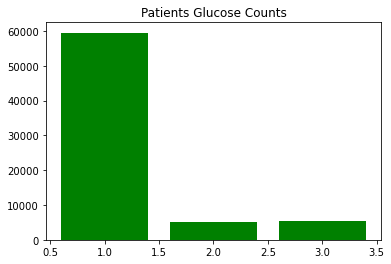

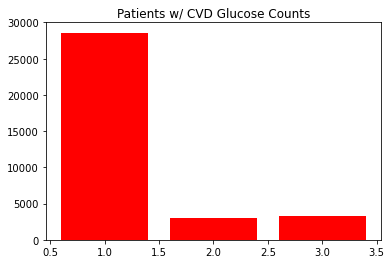

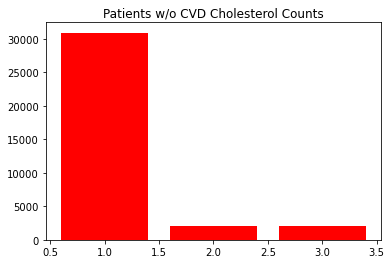

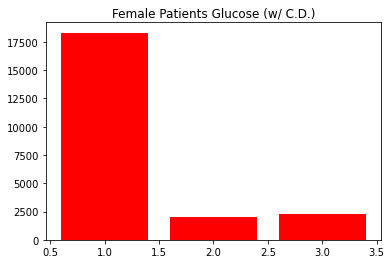

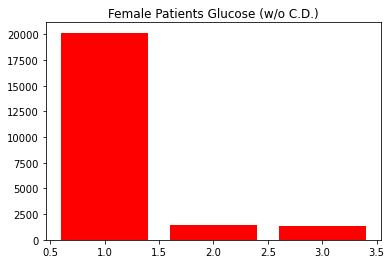

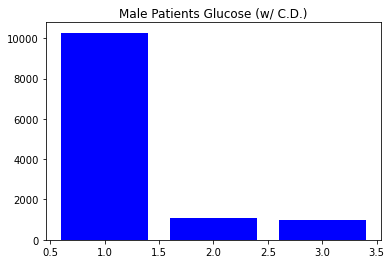

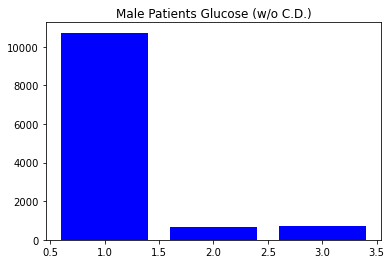

In [59]:
# Glucose
gluc_data = cardio_data.groupby('gluc').count()
 
# creating the bar plot
plt.bar(gluc_data.index.values, gluc_data['id'], color = 'green')
plt.title('Patients Glucose Counts')
plt.show()

cd_gluc_data = cd_cardio_data.groupby('gluc').count()
nocd_gluc_data = no_cd_cardio_data.groupby('gluc').count()
# creating the bar plot
plt.bar(cd_gluc_data.index.values, cd_gluc_data['id'], color = 'red')
plt.title('Patients w/ CVD Glucose Counts')
plt.show()
plt.bar(nocd_gluc_data.index.values, nocd_gluc_data['id'], color = 'red')
plt.title('Patients w/o CVD Cholesterol Counts')
plt.show()

#Female Patient 
f_gluc_data = f_cd_cardio_data.groupby('gluc').count()
plt.bar(f_gluc_data.index.values, f_gluc_data['id'], color = 'red')
plt.title('Female Patients Glucose (w/ C.D.)')
plt.show()

f_no_gluc_data = f_no_cd_cardio_data.groupby('gluc').count()
plt.bar(f_no_gluc_data.index.values, f_no_gluc_data['id'], color = 'red')
plt.title('Female Patients Glucose (w/o C.D.)')
plt.show()

#Male Patient 
m_gluc_data = m_cd_cardio_data.groupby('gluc').count()
plt.bar(m_gluc_data.index.values, m_gluc_data['id'], color = 'blue')
plt.title('Male Patients Glucose (w/ C.D.)')
plt.show()

m_no_gluc_data = m_no_cd_cardio_data.groupby('gluc').count()
plt.bar(m_no_gluc_data.index.values, m_no_gluc_data['id'], color = 'blue')
plt.title('Male Patients Glucose (w/o C.D.)')
plt.show()

<p> While the ratio of those with higher than average glucose is higher in those with cardiovascular disease, the difference between those with and without cardiovascular disease is not nearly as significant as it is in cholesterol levels. </p>
<p> </p>
<b> Smoking Status:</b>

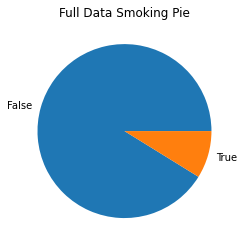

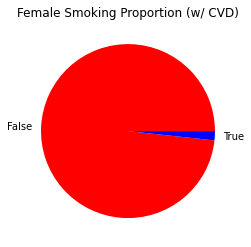

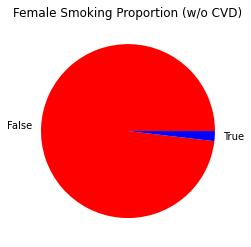

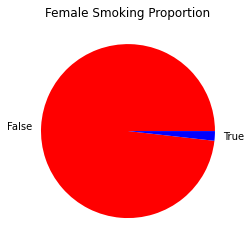

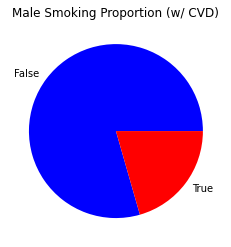

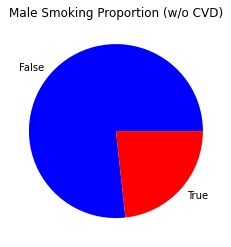

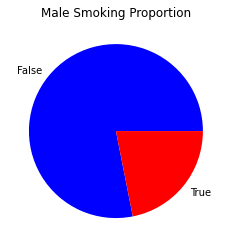

In [67]:
# Smoking status
smoke_counted = cardio_data.groupby(['smoke']).count()

plt.pie(smoke_counted['id'], labels = smoke_counted.index.values, )
plt.title('Full Data Smoking Pie')
plt.show()

#Female Patient 
f_smoke_counted = f_cd_cardio_data.groupby('smoke').count()
plt.pie(f_smoke_counted['id'], labels = f_smoke_counted.index.values, colors = ['red', 'blue'])
plt.title('Female Smoking Proportion (w/ CVD)')
plt.show()

f_nocd_smoke_counted = f_no_cd_cardio_data.groupby('smoke').count()
plt.pie(f_nocd_smoke_counted['id'], labels = f_nocd_smoke_counted.index.values, colors = ['red', 'blue'])
plt.title('Female Smoking Proportion (w/o CVD)')
plt.show()
f_smoke_counted = female_data.groupby('smoke').count()
plt.pie(f_smoke_counted['id'], labels = f_smoke_counted.index.values, colors = ['red', 'blue'])
plt.title('Female Smoking Proportion')
plt.show()

#Male Patients
m_smoke_counted = m_cd_cardio_data.groupby('smoke').count()
plt.pie(m_smoke_counted['id'], labels = m_smoke_counted.index.values, colors = ['blue', 'red'])
plt.title('Male Smoking Proportion (w/ CVD)')
plt.show()

m_nocd_smoke_counted = m_no_cd_cardio_data.groupby('smoke').count()
plt.pie(m_nocd_smoke_counted['id'], labels = m_nocd_smoke_counted.index.values, colors = ['blue', 'red'])
plt.title('Male Smoking Proportion (w/o CVD)')
plt.show()
m_smoke_counted = male_data.groupby('smoke').count()
plt.pie(m_smoke_counted['id'], labels = m_smoke_counted.index.values, colors = ['blue', 'red'])
plt.title('Male Smoking Proportion')
plt.show()

<p> More men than women smoke, and the difference of smoking between those with and without cardiovascular disease is more prominent in men than women. More men without cardiovascular disease smoke than those with, which brings up something to consider when looking at snapshot data, we cannot see the causality or timeline. Do men with cardiovascular disease not smoke as much because their doctors told them not to for their acute health concerns? Do they not smoke now because they smoked in their youth and realized it was bad for their health? Do men with cardiovascular disease start smoking at lower rates because they already experience chest pains/shortness of breath. The same can be asked for factors above, do people with high cholesterol develop cardiovascular disease, or does the presence of cardiovascular disease cause an elevation of cholesterol. As we continue forward looking at the current correlations in the data it is helpful to question how these correlations develop. </p>
<p>  </p>
<b> Alcohol Use:</b>

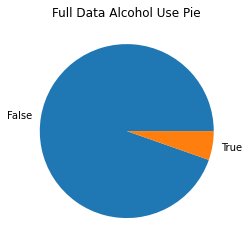

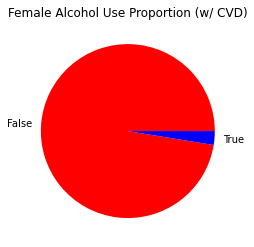

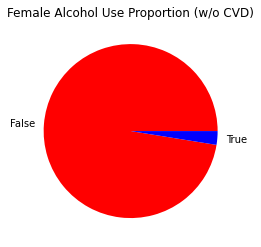

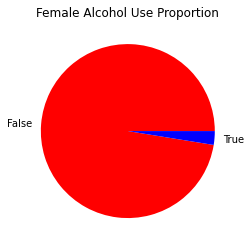

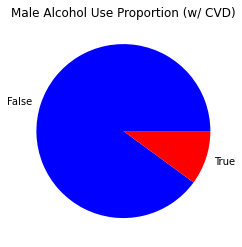

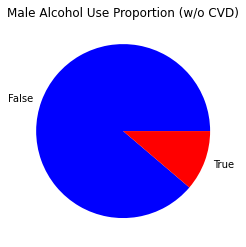

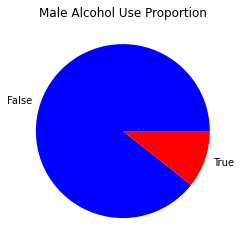

In [66]:
# Alcohol Use
alco_counted = cardio_data.groupby(['alco']).count()

plt.pie(alco_counted['id'], labels = alco_counted.index.values)
plt.title('Full Data Alcohol Use Pie')
plt.show()

#Female Patient Heights
f_alco_counted = f_cd_cardio_data.groupby('alco').count()
plt.pie(f_alco_counted['id'], labels = f_alco_counted.index.values, colors = ['red', 'blue'])
plt.title('Female Alcohol Use Proportion (w/ CVD)')
plt.show()

f_nocd_alco_counted = f_no_cd_cardio_data.groupby('alco').count()
plt.pie(f_nocd_alco_counted['id'], labels = f_nocd_alco_counted.index.values, colors = ['red', 'blue'])
plt.title('Female Alcohol Use Proportion (w/o CVD)')
plt.show()

f_alco_counted = female_data.groupby('alco').count()
plt.pie(f_alco_counted['id'], labels = f_alco_counted.index.values, colors = ['red', 'blue'])
plt.title('Female Alcohol Use Proportion')
plt.show()

#Male Patient Heights
m_alco_counted = m_cd_cardio_data.groupby('alco').count()
plt.pie(m_alco_counted['id'], labels = m_alco_counted.index.values, colors = ['blue', 'red'])
plt.title('Male Alcohol Use Proportion (w/ CVD)')
plt.show()

m_nocd_alco_counted = m_no_cd_cardio_data.groupby('alco').count()
plt.pie(m_nocd_alco_counted['id'], labels = m_nocd_alco_counted.index.values, colors = ['blue', 'red'])
plt.title('Male Alcohol Use Proportion (w/o CVD)')
plt.show()

m_alco_counted = male_data.groupby('alco').count()
plt.pie(m_alco_counted['id'], labels = m_alco_counted.index.values, colors = ['blue', 'red'])
plt.title('Male Alcohol Use Proportion')
plt.show()

<p>Here we see that more men than women choose to consume alcohol. The difference in alcohol use between both those with and without cardiovascular disease is not significant. When looking at alcohol intake it is hard to judge it on a binary, especially when people tend to under report their alcohol consumption. The difference between no drinking, a drink or two a week, and binge drinking on the weekends is severe. Future research may consider a scaling option more similar to that used in glucose/cholesterol. </p>
<p></p>
<b> Physical Activity Level: </b>

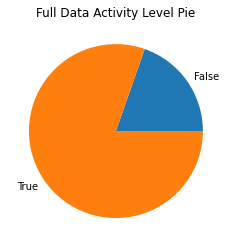

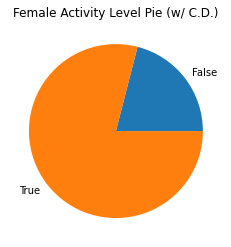

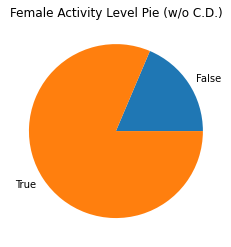

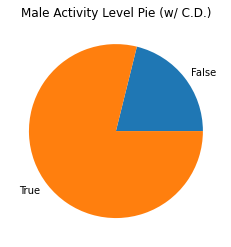

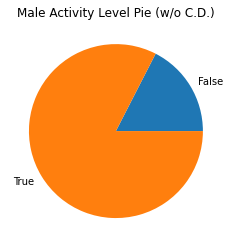

In [27]:
# Active Level
active_counted = cardio_data.groupby(['active']).count()

plt.pie(active_counted['id'], labels = active_counted.index.values)
plt.title('Full Data Activity Level Pie')
plt.show()

#Female Patient Heights
f_active_counted = f_cd_cardio_data.groupby('active').count()
plt.pie(f_active_counted['id'], labels = f_active_counted.index.values)
plt.title('Female Activity Level Pie (w/ C.D.)')
plt.show()

f_nocd_active_counted = f_no_cd_cardio_data.groupby('active').count()
plt.pie(f_nocd_active_counted['id'], labels = f_nocd_active_counted.index.values)
plt.title('Female Activity Level Pie (w/o C.D.)')
plt.show()

#Male Patient Heights
m_active_counted = m_cd_cardio_data.groupby('active').count()
plt.pie(m_active_counted['id'], labels = m_active_counted.index.values)
plt.title('Male Activity Level Pie (w/ C.D.)')
plt.show()

m_nocd_active_counted = m_no_cd_cardio_data.groupby('active').count()
plt.pie(m_nocd_active_counted['id'], labels = m_nocd_active_counted.index.values)
plt.title('Male Activity Level Pie (w/o C.D.)')
plt.show()

<p> Across the board the rate of patients who consider themselves active is the same across the board. Again, similar to alcohol I would recommend scaling rather than binary data in future research. </p>
<p></p>
<b> Cardio Disease Presence: </b>

In [71]:
# general cardio disease stuff
cd_cardio_data.groupby('gender').count()
# cd_cardio_data.describe()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi
gender,,,,,,,,,,,,,,
Female,22616,22616,22616,22616,22616,22616,22616,22616,22616,22616,22616,22616,22616,22616
Male,12363,12363,12363,12363,12363,12363,12363,12363,12363,12363,12363,12363,12363,12363


<p>Our data is roughly split evenly between those with and without cardiovascular disease.</p> <p> </p>

### Further Investigation</br>

<p>Now that I have a better look at our data I have a few questions about the relationships. </p>
<b>Question 1:</b>
<p>Looking at the relationship between cardiovascular disease and blood pressure I was interested in looking at a possible mediating factor. Consistent cardio activity can be helpful in lowering/maintaining your blood pressure. I wanted to see what the relationship of activity level is with blood pressure across those with and without cardiovascular disease.</p>

In [33]:
#Group by active, then look at mean of ap hi repeat for ap lo
q_1 = cardio_data.groupby(['active']).mean()
q_1.head()
#For the entirety of the data the difference between ap_hi across activities is negligable (F128.82 vs T128.81)
#For the entirety of the data the difference between ap_lo across activities is greater (F94.81 vs T97.08)

# Looking at no cd
q_1_nocd = cardio_data[cardio_data['cardio']=='False'].groupby(['active']).mean()
q_1_nocd.head()
#For those without cd the difference between ap_hi across activities is F121.55 vs T120.18, with overall average 120.43
#For those without cd the difference between ap_lo across activities is F87.05 vs T83.63,  with overall average 84.25

# Looking at w cd
q_1_cd = cardio_data[cardio_data['cardio']=='True'].groupby(['active']).mean()
q_1_cd.head()
#For those with cd the difference between ap_hi across activities is F135.13 vs T137.77, with overall average 137.21
#For those with cd the difference between ap_lo across activities is F101.53 vs T111.02,  with overall average 109.02


,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,bmi
active,,,,,,,,,
False,49806.996875,54.536476,164.466105,77.192854,135.130689,101.526015,1.465833,1.274827,28.645728
True,50155.425809,54.429502,164.218155,76.723622,137.766783,111.022341,1.531139,1.278333,28.544827


<p>In the group of those with cardiovascular disease, those who report exercising have higher blood pressures than those who do not. In comparison in the group of those without cardiovascular disease, those who report exercising have lower blood pressure than those who do not. This is such an interesting diversion that I again wonder if we had a more refined measure than binary "yes, I work out" or "no, I don't work out", we may be able to see broader trends in how much or what kind of exercise correlates with blood pressure.</p>
<b>Question 2:</b>
<p>Our glucose levels are related to several bodily processes, one of which is metabolism. What is the relationship between glucose levels and weight(bmi)?</p>

In [39]:
# group by glucose then look at the weight 

gluc1 = cardio_data[cardio_data['gluc']== 1]
gluc2 = cardio_data[cardio_data['gluc']== 2]
gluc3 = cardio_data[cardio_data['gluc']== 3]

gluc1_c = gluc1[gluc1['cardio'] == 'True']
# Mean weight = 76.08 and bmi = 28.26
gluc1_nc = gluc1[gluc1['cardio'] == 'False']
# Mean weight = 71.06 and bmi = 26.35

gluc2_c = gluc2[gluc2['cardio'] == 'True']
# Mean weight = 81.29 and bmi = 30.26
gluc2_nc = gluc2[gluc2['cardio'] == 'False']
# mean weight = 75.77 and bmi = 28.22

gluc3_c = gluc3[gluc3['cardio'] == 'True']
# mean weight = 79.04 and bmi = 29.67
gluc3_nc = gluc3[gluc3['cardio'] == 'False']
# Mean weight = 75.31 and bmi = 27.79

# gluc3_nc.describe()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,bmi
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.0,2015.000000
mean,49791.579156,53.736476,164.681886,75.306352,123.988586,88.796030,2.134491,3.0,27.794335
std,28475.934670,6.355610,7.805769,15.244534,16.107428,191.791415,0.952328,0.0,5.537511
min,27.000000,39.000000,105.000000,37.000000,11.000000,40.000000,1.000000,3.0,16.184437
25%,25469.000000,50.000000,160.000000,65.000000,120.000000,80.000000,1.000000,3.0,23.875115
50%,49473.000000,55.000000,165.000000,72.000000,120.000000,80.000000,3.000000,3.0,26.564345
75%,73526.500000,59.000000,170.000000,84.000000,130.000000,80.000000,3.000000,3.0,30.689868
max,99940.000000,64.000000,192.000000,164.000000,220.000000,8200.000000,3.000000,3.0,65.306122


<p>BMI is an imperfect measure, it doesn't take into consideration body make up and lifestyle, but again while working with the measurements we have available it is interesting to see correlations. On average the weight of those without a cardiovascular disease is lower than those with, and elevated glucose levels also correlates with higher average weight regardless of cardiovascular disease presence.</p>
<b>Question 3:</b>
<p>When looking at behavioral choices that can affect cardiovascular health, two major factors are activity level and the decision to smoke. I wanted to see what that relationship looks like, both if people who are active choose to smoke and vice versa and the impact of those decisions on the correlation to cardiovascular disease.</p>

In [73]:
smoke = cardio_data[cardio_data['smoke']== 'True']
nsmoke = cardio_data[cardio_data['smoke']== 'False']

smoke.groupby('active').count()
# for smokers active: 5162, non-active: 1007

nsmoke.groupby('active').count()
# for non smokers active: 51099, non-active: 12732

smoke_a = smoke[smoke['active'] == 'True'].groupby('cardio').count()
# For active smokers cardio True: 2371, False 2791
smoke_na = smoke[smoke['active'] == 'False'].groupby('cardio').count()
# For non-active smokers cardio True: 558, False 449

nsmoke_a = nsmoke[nsmoke['active'] == 'True'].groupby('cardio').count()
# For active non-smokers cardio True: 25247, False 25852
nsmoke_na = nsmoke[nsmoke['active'] == 'False'].groupby('cardio').count()
# For non-active non-smokers cardio True: 6803, False 5929

# nsmoke_a

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_group,bmi
cardio,,,,,,,,,,,,,,
False,25852,25852,25852,25852,25852,25852,25852,25852,25852,25852,25852,25852,25852,25852
True,25247,25247,25247,25247,25247,25247,25247,25247,25247,25247,25247,25247,25247,25247


<p>The first query was interesting to see, the ratio of active to non-active patients was very similar across smokers and non-smokers, roughly 5:1. These decisions appear to not have a strong effect on each other. When looking at these combination of binary decision markers on the presence of cardiovascular disease we see a similar lack of strong correlations. </p>
<b>Question 4:</b>
<p>A combination I did not consider above was that of age and gender, so is there any difference between the age spread for male and female patients with and without cardiovascular disease. </p>

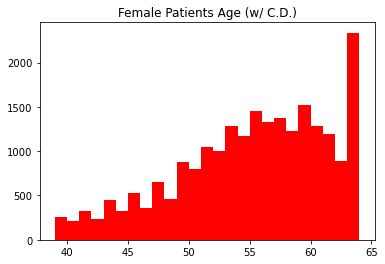

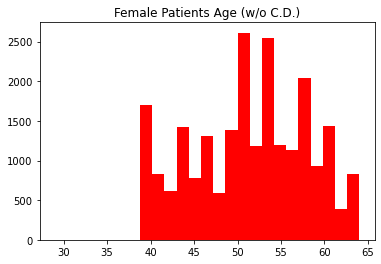

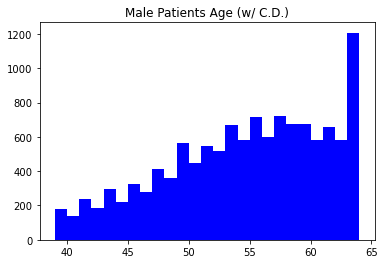

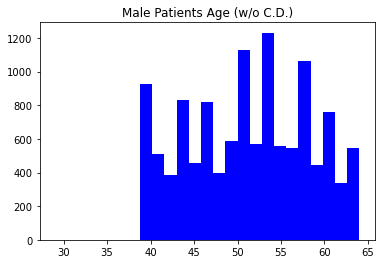

In [72]:
plt.hist(f_cd_cardio_data['age'], bins = 25, color = 'red')
plt.title('Female Patients Age (w/ C.D.)')
plt.show()

plt.hist(f_no_cd_cardio_data['age'], bins = 25, color = 'red')
plt.title('Female Patients Age (w/o C.D.)')
plt.show()

plt.hist(m_cd_cardio_data['age'], bins = 25, color = 'blue')
plt.title('Male Patients Age (w/ C.D.)')
plt.show()

plt.hist(m_no_cd_cardio_data['age'], bins = 25, color = 'blue')
plt.title('Male Patients Age (w/o C.D.)')
plt.show()

# m_no_cd_cardio_data.describe()

<p>The average age of women with cardiovascular disease is 54.66, and without is 51.27. For men the average age of those with cardiovascular disease is 54.07, and without is 51.16. Cardiovascular disease patients tend to be older than those without, regardless of age.  </p>
<b>Question 5:</b>
<p>Again looking at the relationship between a behavior and measurable data. This time looking to see if cholesterol and active lifestyle have a relationship to each other and in combination to cardiovascular disease. </p>

In [86]:
chol1 = cardio_data[cardio_data['cholesterol']== 1]
chol2 = cardio_data[cardio_data['cholesterol']== 2]
chol3 = cardio_data[cardio_data['cholesterol']== 3]

chol1_a = chol1[chol1['active'] == 'True'].groupby('cardio').count()
# Those w normal cholesterol who are active: t - 18024, f - 24008
chol1_na = chol1[chol1['active'] == 'False'].groupby('cardio').count()
# Those w normal cholesterol who are not active: t - 5031, f - 5322

chol2_a = chol2[chol2['active'] == 'True'].groupby('cardio').count()
# Those w above normal cholesterol who are active: t - 4519, f - 3111
chol2_na = chol2[chol2['active'] == 'False'].groupby('cardio').count()
# Those w above normal cholesterol who are not active: t - 1231, f - 688

chol3_a = chol3[chol3['active'] == 'True'].groupby('cardio').count()
# Those w well above normal cholesterol who are active: t - 5075, f - 1524
chol3_na = chol3[chol3['active'] == 'False'].groupby('cardio').count()
# Those w well above normal cholesterol who are not active: t - 1059, f - 368

chol2_a

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_group,bmi
cardio,,,,,,,,,,,,,,
False,3111,3111,3111,3111,3111,3111,3111,3111,3111,3111,3111,3111,3111,3111
True,4519,4519,4519,4519,4519,4519,4519,4519,4519,4519,4519,4519,4519,4519


<p>For those with normal cholesterol levels, those who are active are less likely to have cardiovascular disease, while those who are not show equal rates of disease presence. In the group of those with above normal cholesterol, regardless of activity level these patients are more likely to have cardiovascular disease. Lastly in the group of well above normal cholestrol, again regardless of activity these patients are more likely to have cardiovascular disease but this time at a rate of 3 with to 1 without. Further research on the causal relationship here may be revealing. </p>
<b>Question 6:</b>
<p>The last behavioral to observable relationship I wanted to investigate was alcohol to cholesterol. </p>

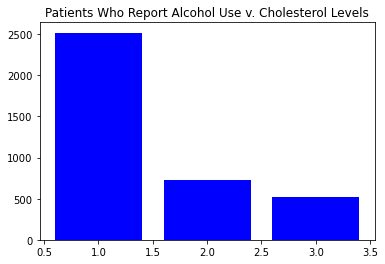

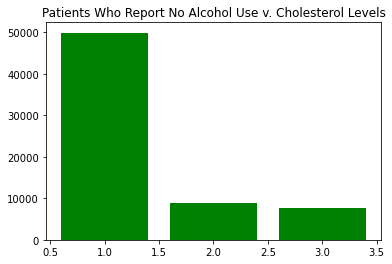

,id,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio,age_group,bmi
cholesterol,,,,,,,,,,,,,,
1,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518,2518
2,727,727,727,727,727,727,727,727,727,727,727,727,727,727
3,519,519,519,519,519,519,519,519,519,519,519,519,519,519


In [47]:
alco_use = cardio_data[cardio_data['alco']== 'True']
no_alco_use = cardio_data[cardio_data['alco'] == 'False']

ac_counts = alco_use.groupby('cholesterol').count()
# in patients who use alcohol:
# 2518 have normal cholesterol, 727 have above normal cholesterol, 519 have well above normal
plt.bar(ac_counts.index.values, ac_counts['id'], color = 'blue')
plt.title('Patients Who Report Alcohol Use v. Cholesterol Levels')
plt.show()

nac_counts = no_alco_use.groupby('cholesterol').count()
# in patients who do not use alcohol:
# 49867 have normal cholesterol, 8822 have above normal cholesterol, 7547 have well above normal
plt.bar(nac_counts.index.values, nac_counts['id'], color = 'Green')
plt.title('Patients Who Report No Alcohol Use v. Cholesterol Levels')
plt.show()

ac_counts

<p>In those the patients that reported not drinking 75% have normal levels, 13% have above normal, and 11% have well above normal cholesterol. In those patients that reported drinking 67% have normal levels, 19% have above normal levels, and 14% have well above normal cholesterol. The overall trend is that those who abstain from drinking have higher rates of more normal cholesterol. </p>

### Conclusion <br>
<p>Looking into health care data is important for understanding the societal level of disease. Overall we see that cardiovascular disease has strongest correlations with cholesterol and blood pressure, both of which are impacted by behavioral and demographic factors. As we continue to look at this kind of patient data we need to keep in mind that we do not have causal information as well as keeping a keen eye on how we can improve our measurements for further research.</p>

In [56]:
cardio_data.to_csv('edited_cardio_train.csv')

<p> Data Source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset </p>

<p> CVD research sources </p>
<p> https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings </p>
<p> https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds) </p>
<p> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3825015/ </p>